## 6.2 Exploring Relationships - Hotel Booking Analysis

## 1. Importing Visualization Libraries and Data

## 2. Data Cleaning

## 3. Correlation matrix heatmap

## 4. Scatterplot

## 5. Pair Plot

## 6. Categorical Plots

## 7. Revisit key questions 

## 8. Define Hypotheses

In [1]:
# 1. Importing Visualization Libraries and Data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Importing orders data - using os library
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\6. Advanced Analytics and Dashboard Design\Hotel Bookings Analysis'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hotel_bookings_cleaned.csv'), index_col = False)

In [4]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
# 2. Data Cleaning

In [6]:
# Data Cleaning
df.columns

Index(['Unnamed: 0', 'index', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'avg_daily_price',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0                          int64
index                               int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   

In [63]:
# Select only variables for the following steps
df2=df[['is_canceled', 'adults', 'children', 'babies', 'avg_daily_price', 'is_repeated_guest', 'previous_cancellations']]

In [64]:
df2

,is_canceled,adults,children,babies,avg_daily_price,is_repeated_guest,previous_cancellations
0,0,2,0.0,0,0.00,0,0
1,0,2,0.0,0,0.00,0,0
2,0,1,0.0,0,75.00,0,0
3,0,1,0.0,0,75.00,0,0
4,0,2,0.0,0,98.00,0,0
...,...,...,...,...,...,...,...
119385,0,2,0.0,0,96.14,0,0
119386,0,3,0.0,0,225.43,0,0
119387,0,2,0.0,0,157.71,0,0
119388,0,2,0.0,0,104.40,0,0


In [10]:
# 3. Correlation matrix heatmap

In [65]:
df2.corr()

,is_canceled,adults,children,babies,avg_daily_price,is_repeated_guest,previous_cancellations
is_canceled,1.000000,0.060017,0.005048,-0.032491,0.047557,-0.084793,0.110133
adults,0.060017,1.000000,0.030447,0.018146,0.230641,-0.146426,-0.006738
children,0.005048,0.030447,1.000000,0.024030,0.324854,-0.032859,-0.024730
babies,-0.032491,0.018146,0.024030,1.000000,0.029186,-0.008943,-0.007501
avg_daily_price,0.047557,0.230641,0.324854,0.029186,1.000000,-0.134314,-0.065646
is_repeated_guest,-0.084793,-0.146426,-0.032859,-0.008943,-0.134314,1.000000,0.082293
previous_cancellations,0.110133,-0.006738,-0.024730,-0.007501,-0.065646,0.082293,1.000000


<Axes: >

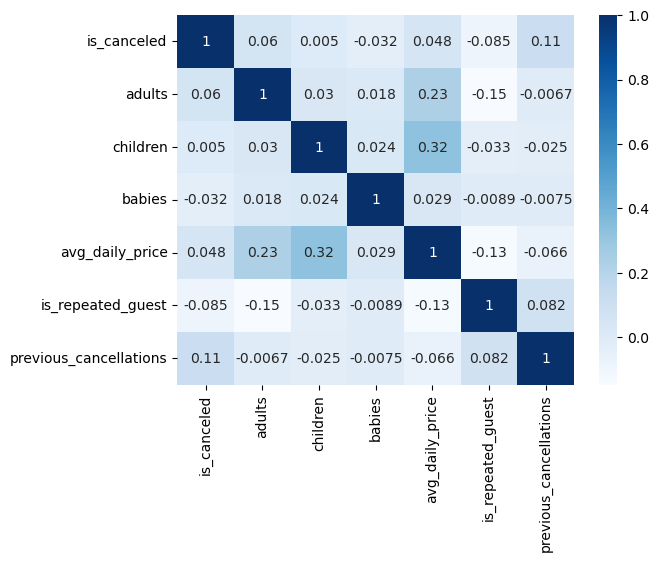

In [25]:
sns.heatmap(df2.corr(), cmap="Blues", annot=True)

In general the selected variables has no relationship or weak relationship. Average daily pice is moderate related with number of children in the booking.

0 means no relationship;
0.1-0.3 means weak relationship;
0.3-0.5 means moderate relationship;
0.5-1.0 means strong relationship

Positive coefficients mean positive relationship and negative coefficients mean negative relationship.

In [16]:
# 4. Scatterplot

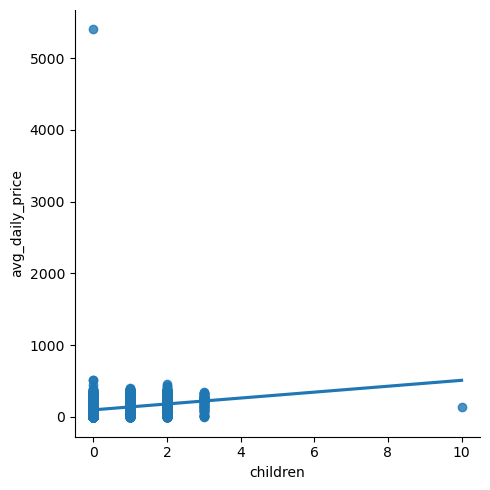

In [26]:
# Since the only moderate relationship is between average daily price and number of children
sns.lmplot(x = 'children', y = 'avg_daily_price', data = df)

In the scatterplot we can see a weak positive relationship, that means the average daily price increases when the number of children increase.
This relationship make sense, since the more children in the room usually additional amount is include in the total price.

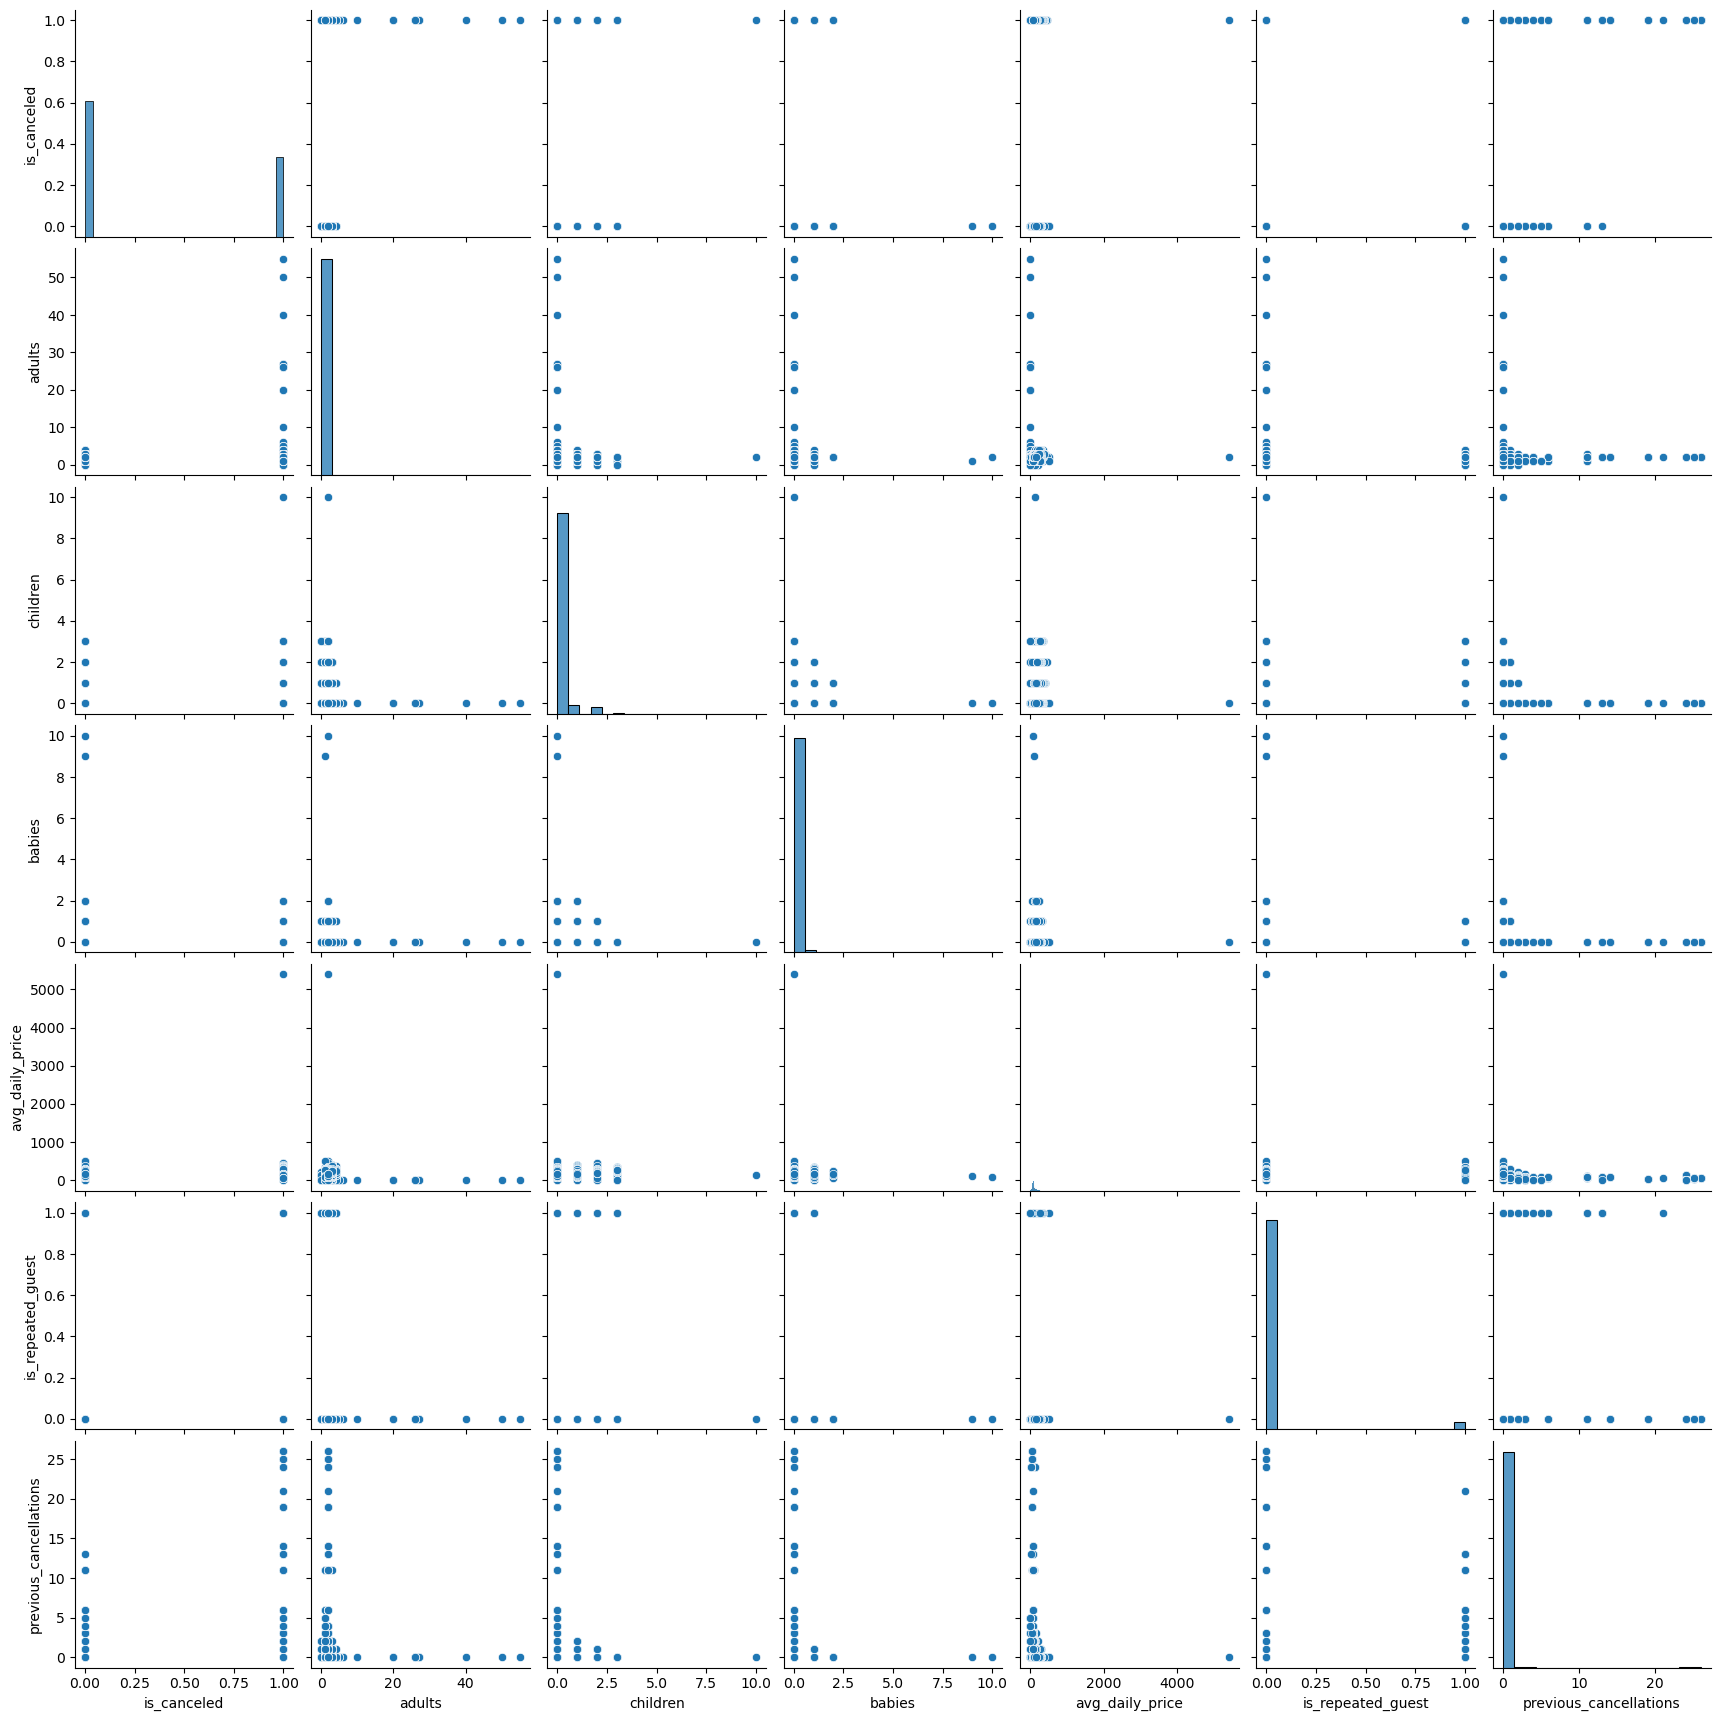

In [27]:
# 5. Pair plot
a = sns.pairplot(df2)

It is hard to spot any strong insight from these plots, probably because the variables are all discrete with just few levels (except average daily price).
More cancelations for the guests who had previous cancelled bookings.
There is an outlier for avg_daily price. Let's remove the observation of avg_daily_price=5400 and analyse again the pair plots

In [35]:
# Delete the outlier of avg_daily_price
no_outlier=df2[df2['avg_daily_price'] <=5000]

In [36]:
no_outlier

,is_canceled,adults,children,babies,avg_daily_price,is_repeated_guest,previous_cancellations
0,0,2,0.0,0,0.00,0,0
1,0,2,0.0,0,0.00,0,0
2,0,1,0.0,0,75.00,0,0
3,0,1,0.0,0,75.00,0,0
4,0,2,0.0,0,98.00,0,0
...,...,...,...,...,...,...,...
119385,0,2,0.0,0,96.14,0,0
119386,0,3,0.0,0,225.43,0,0
119387,0,2,0.0,0,157.71,0,0
119388,0,2,0.0,0,104.40,0,0


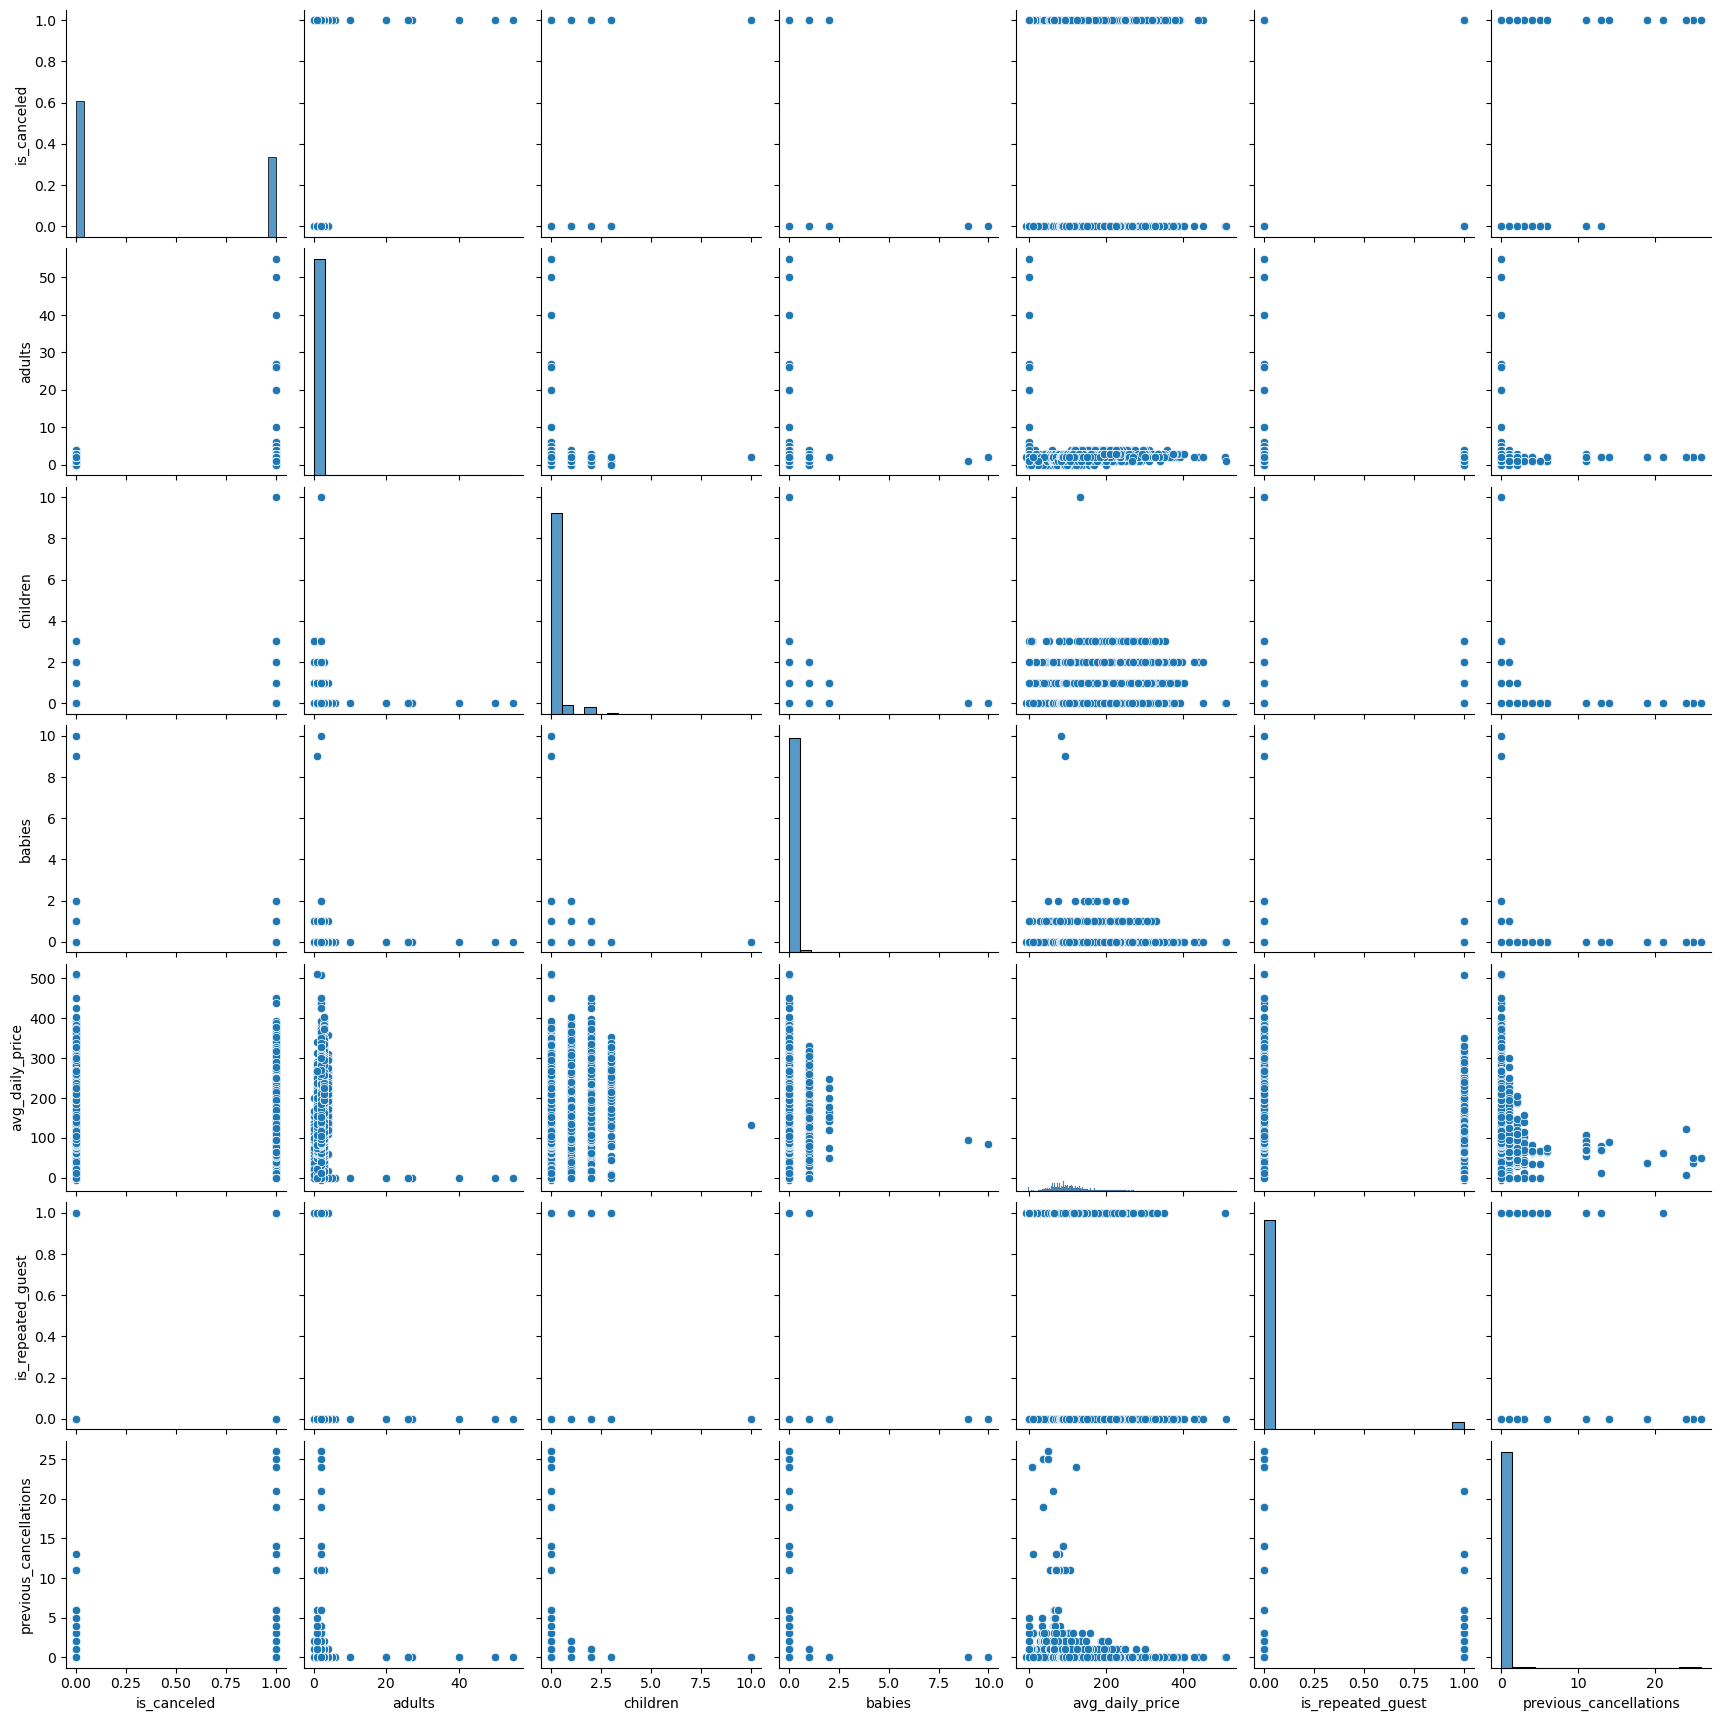

In [37]:
b = sns.pairplot(no_outlier)

After removing the outlier, any important insight in terms of variables relationship was found.

In [39]:
# 6. Categorical Plots

<Axes: xlabel='avg_daily_price', ylabel='Count'>

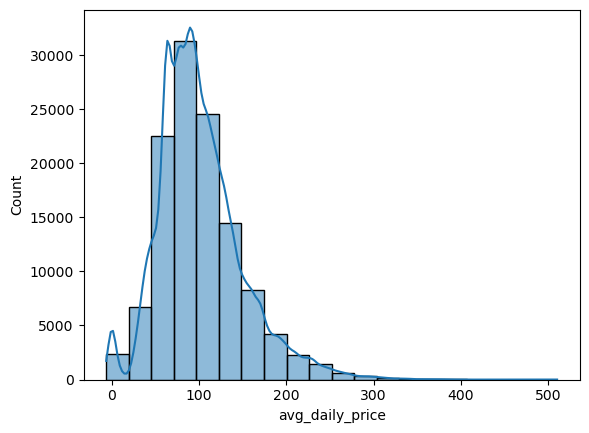

In [42]:
sns.histplot(no_outlier['avg_daily_price'], bins = 20, kde = True)

In [52]:
no_outlier.loc[no_outlier['avg_daily_price'] < 100, 'Price category'] = 'Low price'

In [53]:
no_outlier.loc[(no_outlier['avg_daily_price'] >= 100) & (no_outlier['avg_daily_price'] < 200), 'Price category'] = 'Middle price'

In [54]:
no_outlier.loc[no_outlier['avg_daily_price'] >= 200, 'Price category'] = 'High price'

In [55]:
no_outlier['Price category'].value_counts(dropna = False)

Price category
Low price       66065
Middle price    48241
High price       5083
Name: count, dtype: int64

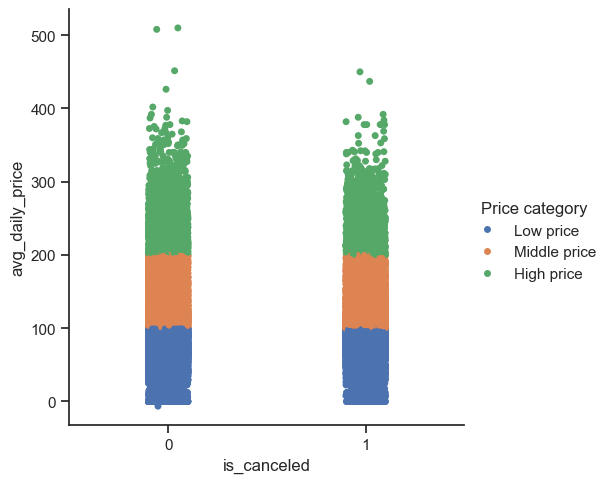

In [57]:
# Create a categorical plot 

sns.set(style="ticks")
g = sns.catplot(x="is_canceled", y="avg_daily_price", hue="Price category", data=no_outlier)

There is no significant difference between cancel bookings or not cancel bookings due to average daily price per room.

In [58]:
#7. Revisit key questions

The previous key questions defined were based on season of the year. At the moment time variables were not analysed. 
The variables analysed showed little relationship, also they have on average 2 levels.

It will be important to analyse the cancellations around the year and other qualitative variables, such as hotel type (city vs. resort), meal, country. 
And the cancellations by month.

In [66]:
# 8. Hypotheses to test

1. More cancellations occur during a high season.
2. More cancellations occur when prices are higher.